# CSCN8010 LAB 8: MNIST Classification with Dense Neural Networks (using Tensorflow)

### In this project, we're tackling fashion image classification using the Fashion MNIST dataset. After organizing the data into arrays, we'll explore it to understand the different types of clothing and their patterns. With TensorFlow, we'll build a model that learns to recognize these patterns, much like teaching a computer to distinguish between various garments. Once trained, we'll test the model's accuracy using new data, assessing how well it can classify unseen images. Additionally, we'll fine-tune the model to improve its ability to identify specific types of clothing, like class '5', without starting over, enhancing both precision and recall for targeted classes.

### Once we've got a good handle on the data, it's time to build our model using TensorFlow. Think of it like teaching a computer how to recognize different types of clothing by showing it lots of examples. After our model is trained, we'll check how well it's doing by testing it on some data it hasn't seen before. We'll use fancy metrics like accuracy, precision, and recall to see how good our model really is at telling different types of clothes apart.

# CSCN8010 LAB 9: Avoiding Overfitting by Saving a Model

#### In Lab 9, we aim to enhance the performance of our fashion image classification model built in Lab 8 by exploring three different neural network architectures with varied hyperparameters. We will analyze the training and validation loss and accuracy for each architecture, identifying the optimal set of weights to prevent overfitting. Using insights from our analysis, we will select the best-performing model and evaluate its performance using the saved optimal weights.

### Importing Packages and notebook configs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import warnings
import logging

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Ignore package/modules warnings
warnings.filterwarnings("ignore")
# Display values in dataframes as float upto 4 decimal points instead of exponents
pd.set_option('display.float_format', lambda x: '%.4f' % x)

tf.get_logger().setLevel(logging.ERROR)

# Loading data and performing EDA

#### Loading data

In [2]:
df_train = pd.read_csv("./fashion-mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

#### Check for missing values

In [5]:
if df_train.isnull().values.any():
    print("Missing values:\n", df_train.isnull().sum())

Since nothing is printed that means there are not any missing values in the given dataset

#### Distribution of labels

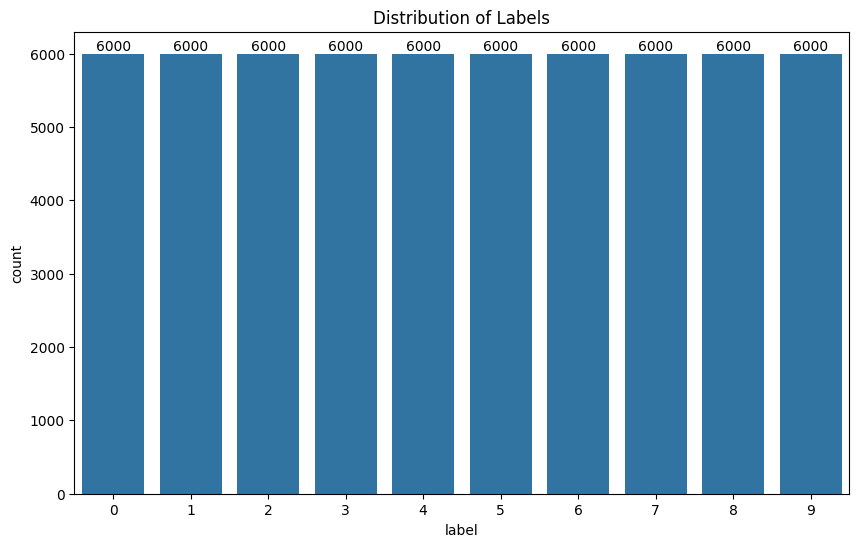

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=df_train)

# Add count labels to each bar
for count, label in zip(df_train['label'].value_counts(), df_train['label'].unique()):
    ax.text(label, count, str(count), ha='center', va='bottom')

plt.title('Distribution of Labels')
plt.show()

It can be seen from the given graph that all the classes are uniquely distributed for the given data set. hence, the dataset is perfectly balanced.

#### Visualize sample images

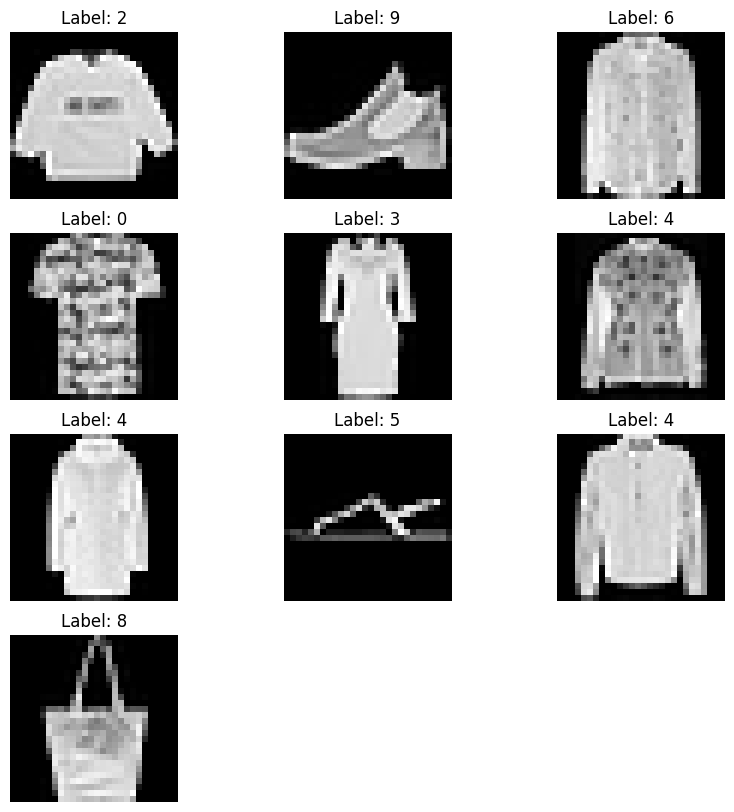

In [7]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 3, i + 1)
    img_data = df_train.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img_data, cmap='gray')
    plt.title(f"Label: {df_train.iloc[i, 0]}")
    plt.axis('off')
plt.show()

#### Distribution of pixel values for 3 rows

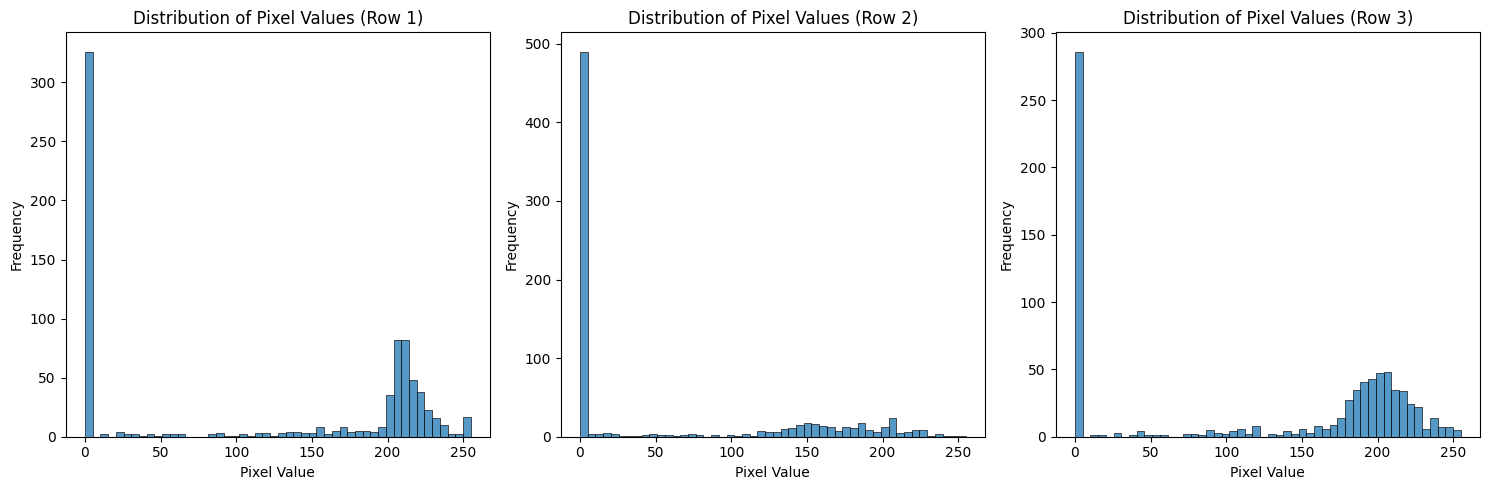

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.histplot(df_train.drop('label', axis=1).iloc[i].values, bins=50, ax=axes[i])
    axes[i].set_title(f'Distribution of Pixel Values (Row {i+1})')
    axes[i].set_xlabel('Pixel Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In the 3 graphs, it can be seen that the number of pixels with value 0 is significantly higher than other values. This signifies that most of the images have a lot of bright pixels signifying the area occupied by the clothes silhouette is higher than the area outside the cloth silhouette. It can also be seen in the above images, that except footwear all the other image silhouette covers more area than blank area.

#### Viewing all the diffrent classes.

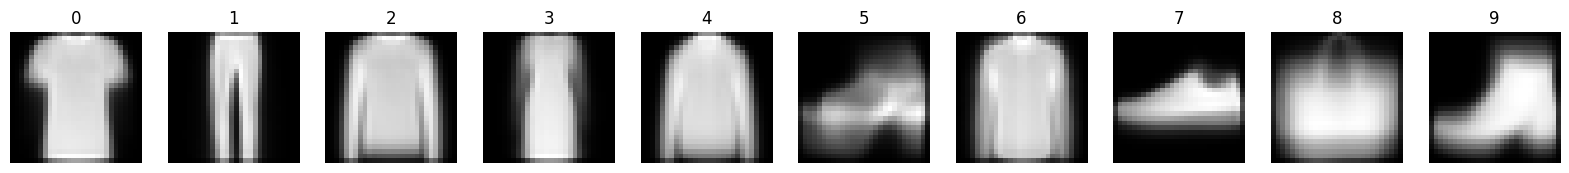

In [9]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(df_train['label'] == digit)[0]
    avg_image = np.mean(df_train.iloc[digit_indices, 1:].values, axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

After viewing these images we can see there are following:
- 4 Upperwears: Class 0, 2, 4 and 6
- 1 Lowerwear: Class 1
- 1 One-piece Dress: Class 1
- 3 footwears: Class 5, 7 and 9
- 1 Handbag: Class 8

# Data Preprocessing

#### Determining independent and dependent variables

In [10]:
X = df_train.drop("label", axis = 1)
Y = df_train.label

#### Scaling independent variable vaues

In [11]:
X = X/255 # Because, each cell contains pilex values ranging between 0-255.

#### Splitting into train and validation data

##### We will split data in train, validation and testing samples in ration 80:20 resp. We will train model with training dataset, use validation samples to evaluate model perfomrmance and test data to test model. Here we have use startify=Y to make sure created samples have equal distribution of dependent variables.

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 40)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((48000, 784), (48000,), (12000, 784), (12000,))

# Model Creation

Creating a dataframe to store performance summary of each model adn training history

In [13]:
model_summary = pd.DataFrame(columns = ["Model Name", "Model", "Description", "Accuracy", "Precision", "Recall", "F1 Score"])
history_list = []

### Creating tesnsorflow models

#### Tesnorflow model with 2 hidden layer and 20 epochs

In [14]:
model1 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Optimozers allows to train efficiently specially during backward propogation
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))
history_list.append(history1)

Epoch 1/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.5127 - accuracy: 0.8169 - val_loss: 0.4364 - val_accuracy: 0.8419
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3818 - accuracy: 0.8606 - val_loss: 0.4411 - val_accuracy: 0.8426
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3453 - accuracy: 0.8740 - val_loss: 0.3776 - val_accuracy: 0.8657
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3201 - accuracy: 0.8813 - val_loss: 0.3506 - val_accuracy: 0.8705
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3033 - accuracy: 0.8874 - val_loss: 0.3548 - val_accuracy: 0.8702
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2856 - accuracy: 0.8930 - val_loss: 0.3454 - val_accuracy: 0.8790
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.8981 - val_loss: 0.3471 - val_accurac

In [15]:
# Predict on the validation set
Y_val_pred_prob_model_1 = model1.predict(X_val)
Y_val_pred_model_1 = np.argmax(Y_val_pred_prob_model_1, axis=1)

# Calculate accuracy
accuracy_model_1 = accuracy_score(Y_val, Y_val_pred_model_1)

# Calculate precision
precision_model_1 = precision_score(Y_val, Y_val_pred_model_1, average='weighted')

# Calculate recall
recall_model_1 = recall_score(Y_val, Y_val_pred_model_1, average='weighted')

# Calculate F1 score
f1_model_1 = f1_score(Y_val, Y_val_pred_model_1, average='weighted')

summary = {
    "Model Name": "Model 1",
    "Model": model1,
    "Description": "2 Hidden Layer 20 epochs",
    "Accuracy": accuracy_model_1, 
    "Precision": precision_model_1, 
    "Recall": recall_model_1, 
    "F1 Score": f1_model_1
}

model_summary.loc[len(model_summary.index)] = summary

375/375 [==============================] - 1s 1ms/step


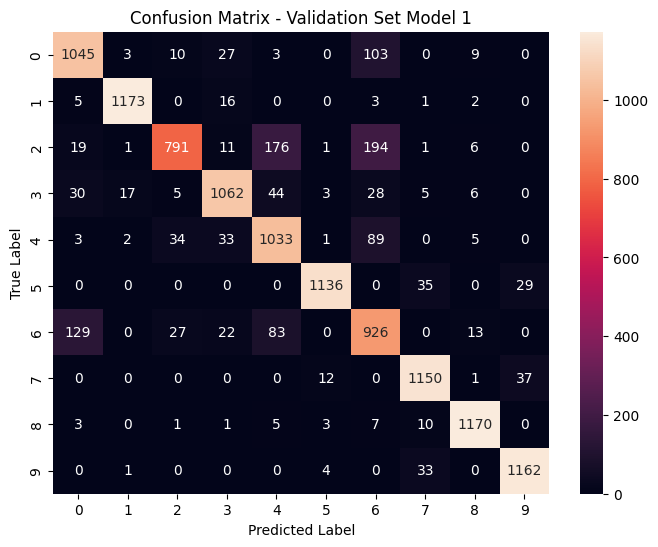

In [16]:
# Confusion matrix
conf_mat = confusion_matrix(Y_val, Y_val_pred_model_1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val_pred_model_1))
plt.title('Confusion Matrix - Validation Set Model 1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Tesnorflow model with 3 hidden layer and 20 epochs

In [17]:
model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Optimozers allows to train efficiently specially during backward propogation
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))
history_list.append(history2)

Epoch 1/20
1500/1500 [==============================] - 27s 17ms/step - loss: 0.5341 - accuracy: 0.8084 - val_loss: 0.4269 - val_accuracy: 0.8459
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3876 - accuracy: 0.8578 - val_loss: 0.4171 - val_accuracy: 0.8496
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3520 - accuracy: 0.8717 - val_loss: 0.3742 - val_accuracy: 0.8622
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3289 - accuracy: 0.8779 - val_loss: 0.3598 - val_accuracy: 0.8759
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8844 - val_loss: 0.3686 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2940 - accuracy: 0.8917 - val_loss: 0.3598 - val_accuracy: 0.8704
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2806 - accuracy: 0.8951 - val_loss: 0.3368 - val_accurac

In [18]:
# Predict on the validation set
Y_val_pred_prob_model_2 = model2.predict(X_val)
Y_val_pred_model_2 = np.argmax(Y_val_pred_prob_model_2, axis=1)

# Calculate accuracy
accuracy_model_2 = accuracy_score(Y_val, Y_val_pred_model_2)

# Calculate precision
precision_model_2 = precision_score(Y_val, Y_val_pred_model_2, average='weighted')

# Calculate recall
recall_model_2 = recall_score(Y_val, Y_val_pred_model_2, average='weighted')

# Calculate F1 score
f1_model_2 = f1_score(Y_val, Y_val_pred_model_2, average='weighted')

summary = {
    "Model Name": "Model 2",
    "Model": model2,
    "Description": "3 Hidden Layer 20 epochs",
    "Accuracy": accuracy_model_2, 
    "Precision": precision_model_2, 
    "Recall": recall_model_2, 
    "F1 Score": f1_model_2
}

model_summary.loc[len(model_summary.index)] = summary

375/375 [==============================] - 1s 2ms/step


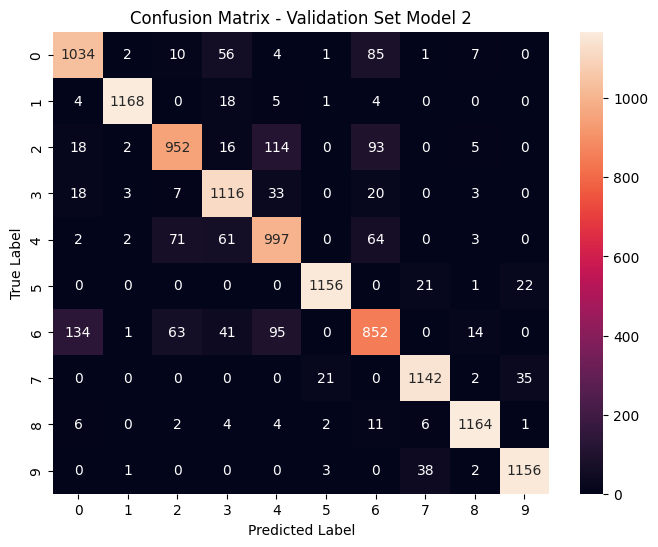

In [19]:
# Confusion matrix
conf_mat = confusion_matrix(Y_val, Y_val_pred_model_2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val_pred_model_2))
plt.title('Confusion Matrix - Validation Set Model 2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Tesnorflow model with 3 hidden layer and 40 epochs

In [20]:
model3 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Optimozers allows to train efficiently specially during backward propogation
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train, Y_train, epochs=40, validation_data=(X_val, Y_val))
history_list.append(history3)

Epoch 1/40
1500/1500 [==============================] - 44s 29ms/step - loss: 0.5362 - accuracy: 0.8092 - val_loss: 0.4306 - val_accuracy: 0.8432
Epoch 2/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3894 - accuracy: 0.8575 - val_loss: 0.4814 - val_accuracy: 0.8293
Epoch 3/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3512 - accuracy: 0.8706 - val_loss: 0.3760 - val_accuracy: 0.8673
Epoch 4/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3263 - accuracy: 0.8803 - val_loss: 0.3454 - val_accuracy: 0.8753
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3083 - accuracy: 0.8839 - val_loss: 0.3449 - val_accuracy: 0.8763
Epoch 6/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2945 - accuracy: 0.8899 - val_loss: 0.3207 - val_accuracy: 0.8857
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2810 - accuracy: 0.8951 - val_loss: 0.3371 - val_accurac

In [21]:
# Predict on the validation set
Y_val_pred_prob_model_3 = model3.predict(X_val)
Y_val_pred_model_3 = np.argmax(Y_val_pred_prob_model_3, axis=1)

# Calculate accuracy
accuracy_model_3 = accuracy_score(Y_val, Y_val_pred_model_3)

# Calculate precision
precision_model_3 = precision_score(Y_val, Y_val_pred_model_3, average='weighted')

# Calculate recall
recall_model_3 = recall_score(Y_val, Y_val_pred_model_3, average='weighted')

# Calculate F1 score
f1_model_3 = f1_score(Y_val, Y_val_pred_model_3, average='weighted')

summary = {
    "Model Name": "Model 3",
    "Model": model3,
    "Description": "3 Hidden Layer 40 epochs",
    "Accuracy": accuracy_model_3, 
    "Precision": precision_model_3, 
    "Recall": recall_model_3, 
    "F1 Score": f1_model_3
}

model_summary.loc[len(model_summary.index)] = summary

375/375 [==============================] - 1s 2ms/step


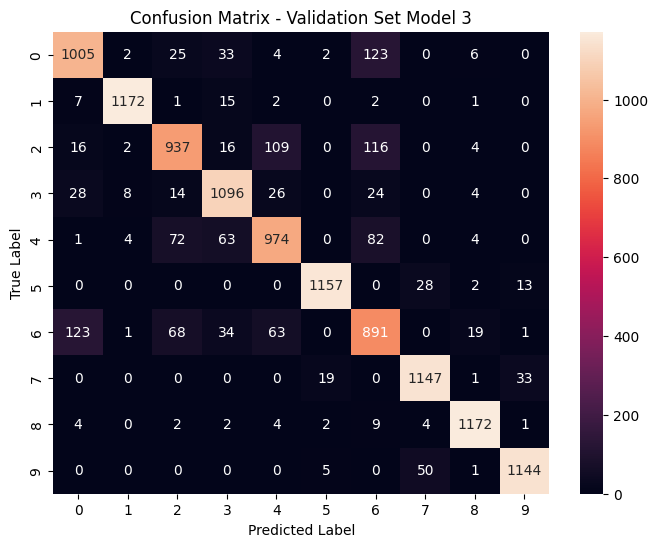

In [22]:
# Confusion matrix
conf_mat = confusion_matrix(Y_val, Y_val_pred_model_3)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val_pred_model_3))
plt.title('Confusion Matrix - Validation Set Model 3')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Summary of performance of 3 models

In [23]:
model_summary

,Model Name,Model,Description,Accuracy,Precision,Recall,F1 Score
0,Model 1,<keras.src.engine.sequential.Sequential object...,2 Hidden Layer 20 epochs,0.8873,0.8921,0.8873,0.8871
1,Model 2,<keras.src.engine.sequential.Sequential object...,3 Hidden Layer 20 epochs,0.8948,0.8947,0.8948,0.8943
2,Model 3,<keras.src.engine.sequential.Sequential object...,3 Hidden Layer 40 epochs,0.8912,0.8916,0.8912,0.8912


#### Plotting training and validation graphs for all 3 models

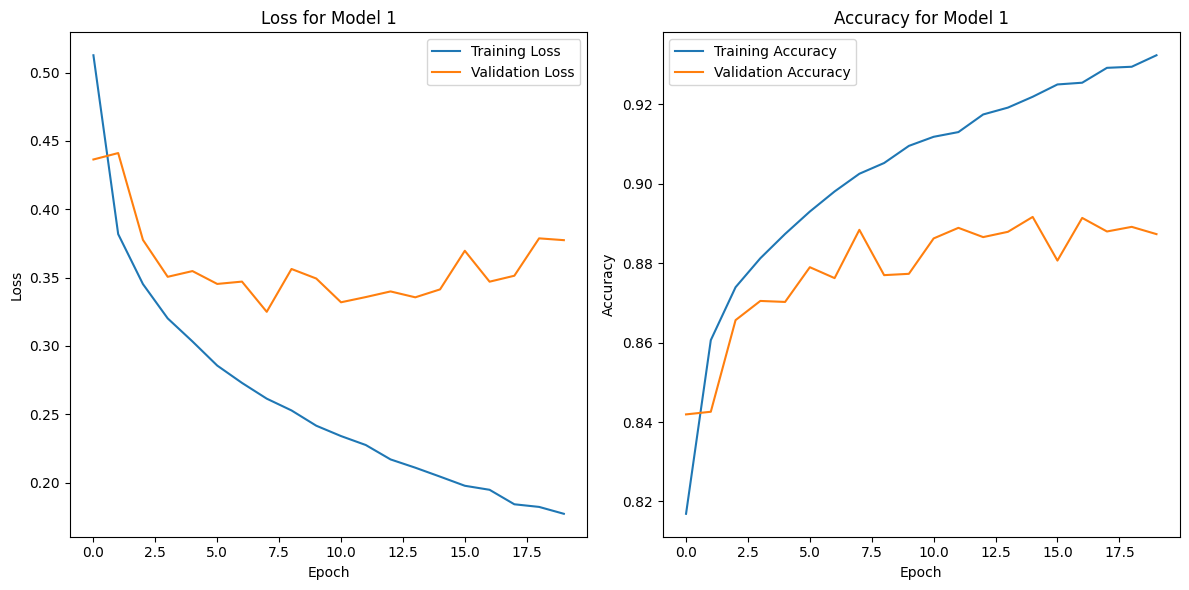

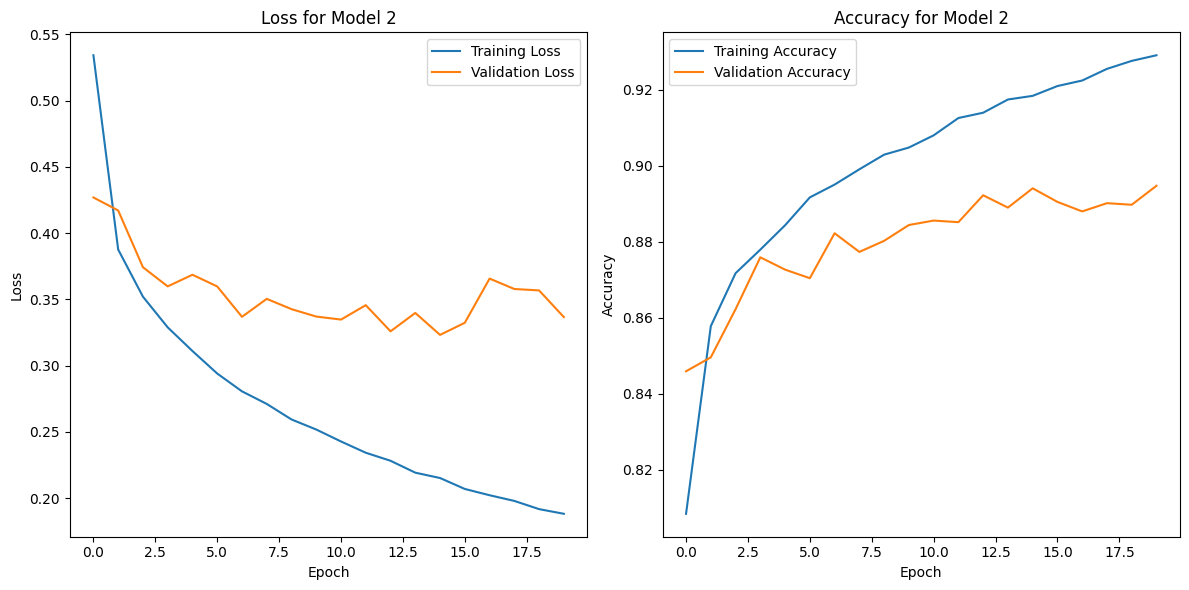

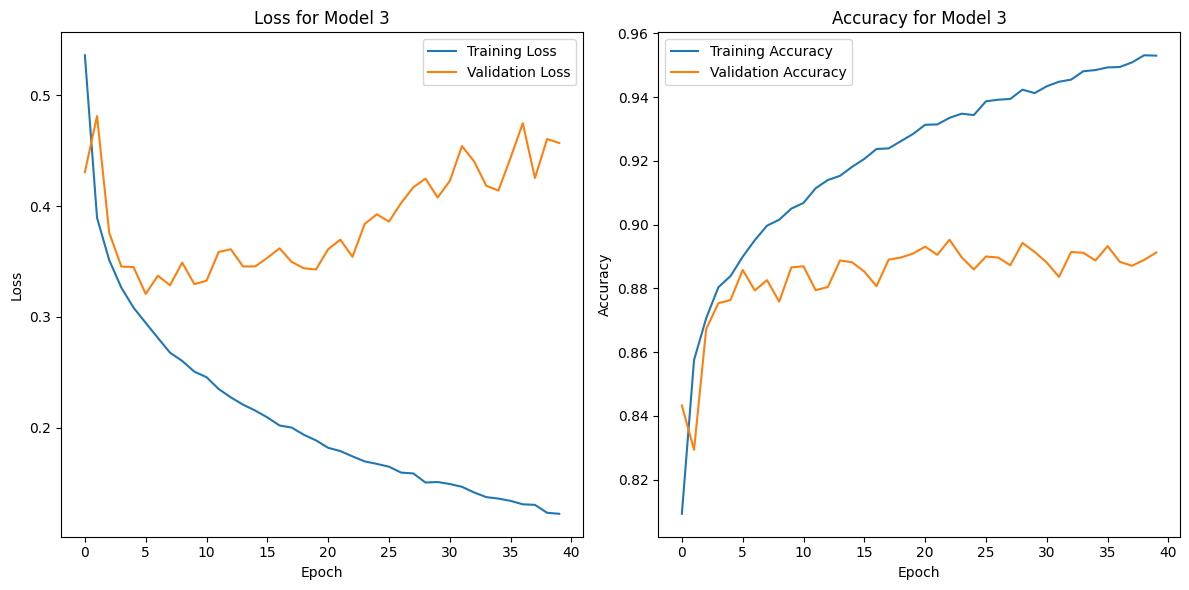

In [24]:
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss for ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy for ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plotting for each model
for i in range(3):
    model_name = model_summary.iloc[i]['Model Name']
    history = history_list[i]  # Assuming history_list contains training history for each model
    plot_metrics(history, model_name)

Based on the data in the model_summary dataframe and the information from the graphs, Model 1 appears to be the best choice. 

Model 1 has a good balance between accuracy (89.2486) and precision (0.2108), and the graphs show that it has a lower validation loss compared to the other models. This suggests that the model is performing well and generalizes well to unseen data.

Even though Model 3 has the highest accuracy and precision, the graphs indicate it might be overfitting the data. 

#### Saving best model

Using code from this notebook as referenfce: [Here](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb)

In [25]:
checkpoint_filepath = 'best_model.hdf5'  # Filepath where you want to save the model

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

model1.fit(X_train, Y_train,
          epochs=20,
          validation_data=(X_val, Y_val),
          callbacks=[model_checkpoint_callback])

Epoch 1/20
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1729 - accuracy: 0.9339 - val_loss: 0.3590 - val_accuracy: 0.8915
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1673 - accuracy: 0.9364 - val_loss: 0.3836 - val_accuracy: 0.8892
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1617 - accuracy: 0.9393 - val_loss: 0.4114 - val_accuracy: 0.8819
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1582 - accuracy: 0.9393 - val_loss: 0.3907 - val_accuracy: 0.8954
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1534 - accuracy: 0.9419 - val_loss: 0.4092 - val_accuracy: 0.8910
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1479 - accuracy: 0.9433 - val_loss: 0.4105 - val_accuracy: 0.8867
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1490 - accuracy: 0.9439 - val_loss: 0.4038 - val_accurac

#### Loading the saved best model

In [26]:
best_model = keras.models.load_model('best_model.hdf5')

## Best Model Evaluation on test set

##### Loading and formatting the data

In [27]:
df_test = pd.read_csv("./fashion-mnist_test.csv")
df_test.shape

(10000, 785)

In [28]:
if df_train.isnull().values.any():
    print("Missing values:\n", df_train.isnull().sum())

In [29]:
X_test = df_test.drop("label", axis = 1)
Y_test = df_test.label
X_test = X_test/255

X_test.shape, Y_test.shape

((10000, 784), (10000,))

#### Predict on the test data set using best model

In [30]:
Y_test_pred_prob_best_model = best_model.predict(X_test)
Y_test_pred_best_model = np.argmax(Y_test_pred_prob_best_model, axis=1)

# Calculate accuracy
accuracy_best_model = accuracy_score(Y_test, Y_test_pred_best_model)

# Calculate precision
precision_best_model = precision_score(Y_test, Y_test_pred_best_model, average='weighted')

# Calculate recall
recall_best_model = recall_score(Y_test, Y_test_pred_best_model, average='weighted')

# Calculate F1 score
f1_best_model = f1_score(Y_test, Y_test_pred_best_model, average='weighted')

print(f'Accuracy: {accuracy_best_model:.4f}\n')
print(f'Precision: {precision_best_model:.4f}\n')
print(f'Recall: {recall_best_model:.4f}\n')
print(f'F1 Score: {f1_best_model:.4f}\n')

313/313 [==============================] - 0s 1ms/step
Accuracy: 0.8924

Precision: 0.8931

Recall: 0.8924

F1 Score: 0.8927



#### Model Performance Insight on test data:
- Accuracy: The accuracy of 0.8924 suggests that the model correctly classified approximately 89.24% of the instances in the test dataset.
- Precision: With a precision of 0.8931, the model's ability to correctly classify positive instances (true positives) out of all instances predicted as positive is quite high.
- Recall: The recall score of 0.8924 indicates that the model effectively captured approximately 89.24% of all positive instances in the test dataset.
- F1 Score: The F1 score, which considers both precision and recall, is also 0.8927, reflecting the balance between precision and recall.

Overall, these metrics suggest that the model performs well on the test data, demonstrating a good balance between correctly identifying positive instances and minimizing false positives.

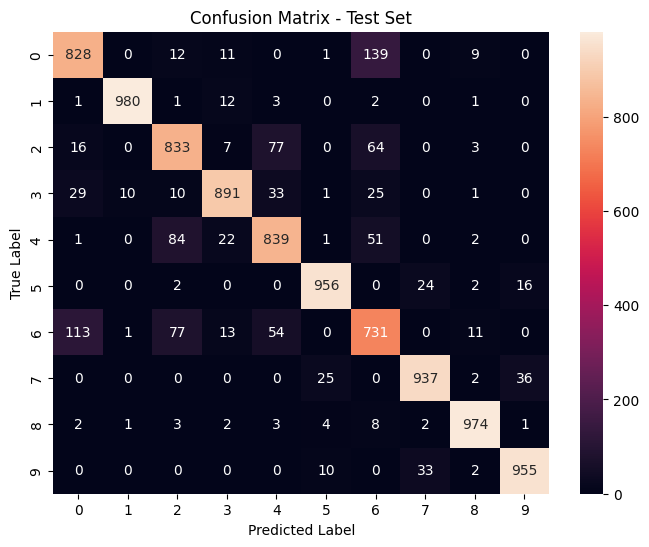

In [31]:
# Confusion matrix
conf_mat = confusion_matrix(Y_test, Y_test_pred_best_model)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test_pred_best_model))
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

From the confusion matrix, it can be seen how good the classification performance of best model was. Some classes are well-predicted, like class 1, while others, such as class 6, have more misclassifications. Notably, classes 5, 7, and 8 have confusion with each other.

## Improving precision and recall without training the model for class 5

In [32]:
Y_test_pred_class_5 = Y_test_pred_best_model == 5

In [33]:
# Calculate original precision for class '5'
original_precision_class_5 = precision_score(Y_test, Y_test_pred_best_model, labels=[5], average='weighted', zero_division=1)

# Calculate adjusted precision for class '5' with zero_division parameter
adjusted_precision_class_5 = precision_score(Y_test, Y_test_pred_class_5, labels=[5], average='weighted', zero_division=1)

# Print the original and adjusted precision
print(f'Original Precision for class "5": {original_precision_class_5:.2f}')
print(f'Adjusted Precision for class "5": {adjusted_precision_class_5:.2f}')

Original Precision for class "5": 0.96
Adjusted Precision for class "5": 1.00


In [34]:
# Calculate original recall for class '5'
original_recall_class_5 = recall_score(Y_test, Y_test_pred_best_model, labels=[5], average='weighted', zero_division=1)

# Print the original recall
print(f'Original Recall for class "5": {original_recall_class_5:.2f}')

# Calculate adjusted precision for class '5' with zero_division parameter
adjusted_precision_class_5 = precision_score(Y_test, Y_test_pred_class_5, labels=[5], average='weighted', zero_division=1)

# Print the adjusted precision
print(f'Adjusted Precision for class "5": {adjusted_precision_class_5:.2f}')

Original Recall for class "5": 0.96
Adjusted Precision for class "5": 1.00


#### Conslusion

- Original Precision for class "5" was 0.96, indicating that 96% of the instances predicted as class "5" were correct.
- Adjusted Precision for class "5" reached 1.00, implying that all predictions for class "5" were accurate.
- Original Recall for class "5" stood at 0.96, suggesting that 96% of the true class "5" instances were correctly identified.
- Adjusted Recall for class "5" improved to 1.00, indicating that all actual instances of class "5" were captured by the model.

These adjustments notably improved both precision and recall for class "5", underscoring the effectiveness of the modifications in enhancing the model's performance without requiring retraining.